# PROJECT : DOES ALCOHOL AFFECT SUCCESS
    
In this project I applied Exploratory Data Analysis, Data Visualisation techniques and various analytical operations like data 
cleaning and data manipulation using different python libraries like NumPy, Pandas and Matplotlib to predict student's final 
grade according to student's alcohol consumption, found correlation between features, found weekly consumption of alcohol and 
many other useful insights.

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of 
interesting social, gender and study information about students.

In [ ]:
# here are some helpful libraries to import in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt

In [8]:
# importing the CSV file
data = pd.read_csv("D:\Datasets\student-mat.csv")

In [9]:
# I use final grade = G3, and weekly alcohol consumption = Dalc + Walc 
# columns in the Dataset
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Correlation between features

For broad perspective lets look at first correlation of features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text major ticklabel objects>)

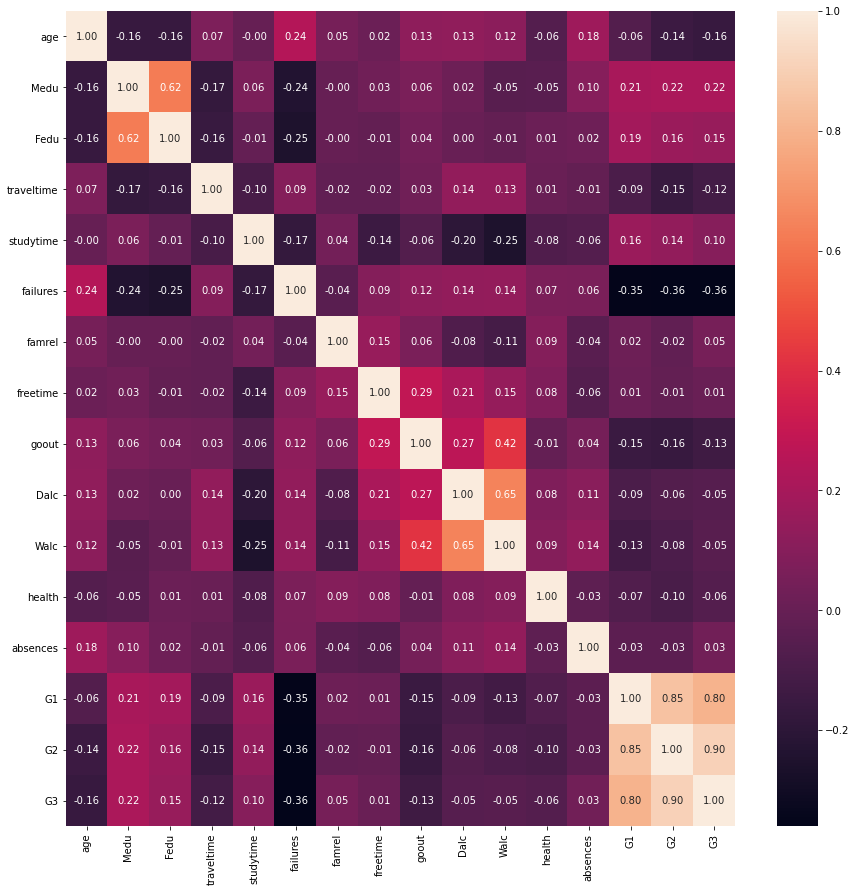

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f", cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

As it can be observed from the heapmap only exam scores are the high intensity area and are highly correlated with each other.






Now, I'm going to combine weekdays alcohol consumption with weekends alcohol consumption.

In [17]:
data['Dalc'] = data['Dalc'] + data['Walc']

# Weekly Consumption of Alcohol

Text(0.5, 0, 'Weekly alcohol consumption')

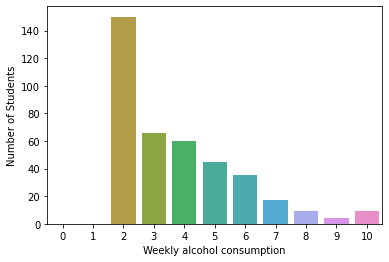

In [18]:
# Plotted a Bargraph to find the weekly consumption of alcohol

list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

It can be seen from the Bargraph that there is no student who does not consume alcohol. However, all students at least 2 times 
in a week consume alcohol.

Conclusion: Students drink alcohol at least 2 times in a week.

# Final Exam Scores According to Student's Alcohol consumption

I visualize taken total grades according to alcohol consumption.

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

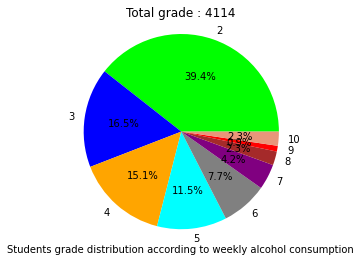

In [19]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

Well, it looks like students who consume alcohol 2 times in a week more successful than others. However, it actually cannot be 
understood from this graph. Because number of students who consume alcohol 2 times in a week more than others. Therefore, lets 
look at swarm plot to understand whether alcohol affects the success or not.

# Students grade with grade average according to alcohol consumption

In order to understand whether alcohol affects students success, I compare grades with average.

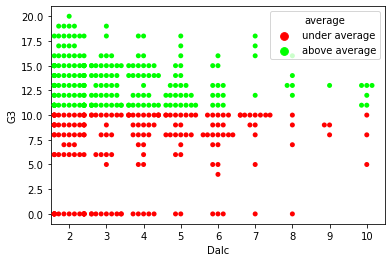

In [20]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

Final exam average grade is 10.4

As it can be seen swarm plot, student who takes highest grade consumes alcohol only 2 times in a week.

In [21]:
# average grade of students who consume alcohol 2 times in a week

sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

# Average Grade

Text(0.5, 0, 'Weekly alcohol consumption')

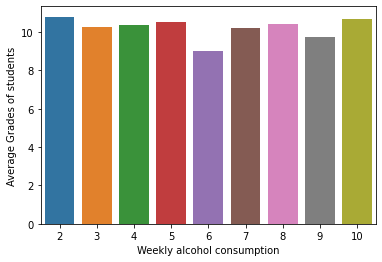

In [22]:
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')

It can be observed from the Bargraph that the average grade is almost same for all the "Weekly alcohol consomption"

CONCLUSION FROM THE PROJECT:
    Number of students who consume alcohol 2 times a week are more, therefore the number of students who prove to be successful
    are more among the students who consume alcohol 2 times a week. But, the average grade for all the "Weekly alcohol 
    consumption" is same.